📉 RMSE: 174859.02
📈 R² Score: 0.765


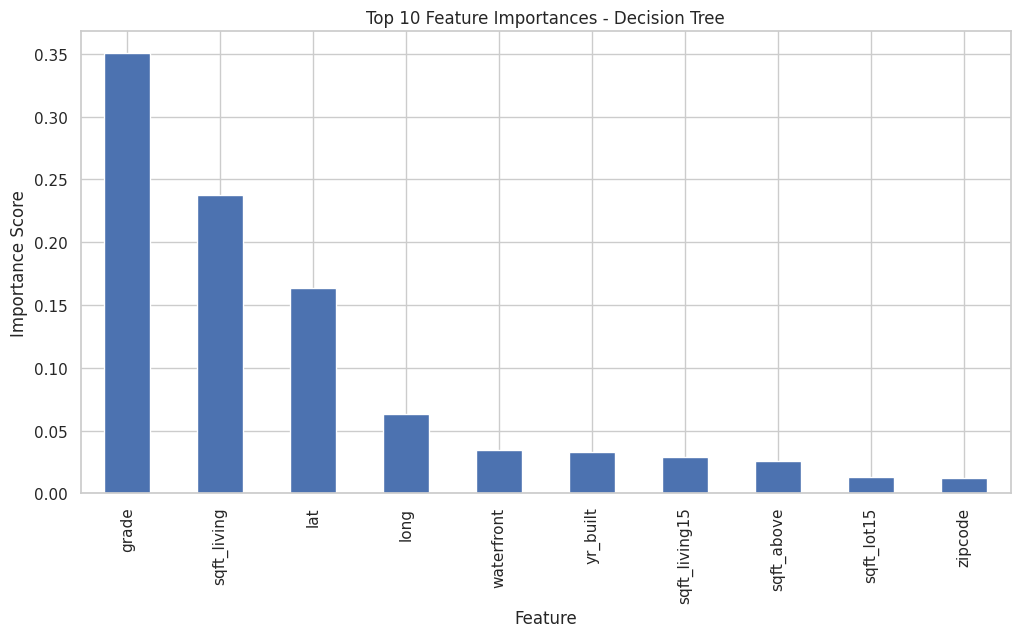

📌 Explanation: This bar chart shows the top 10 features that the Decision Tree considered most important when predicting house prices. Higher bars mean the feature had more influence in the decision splits.


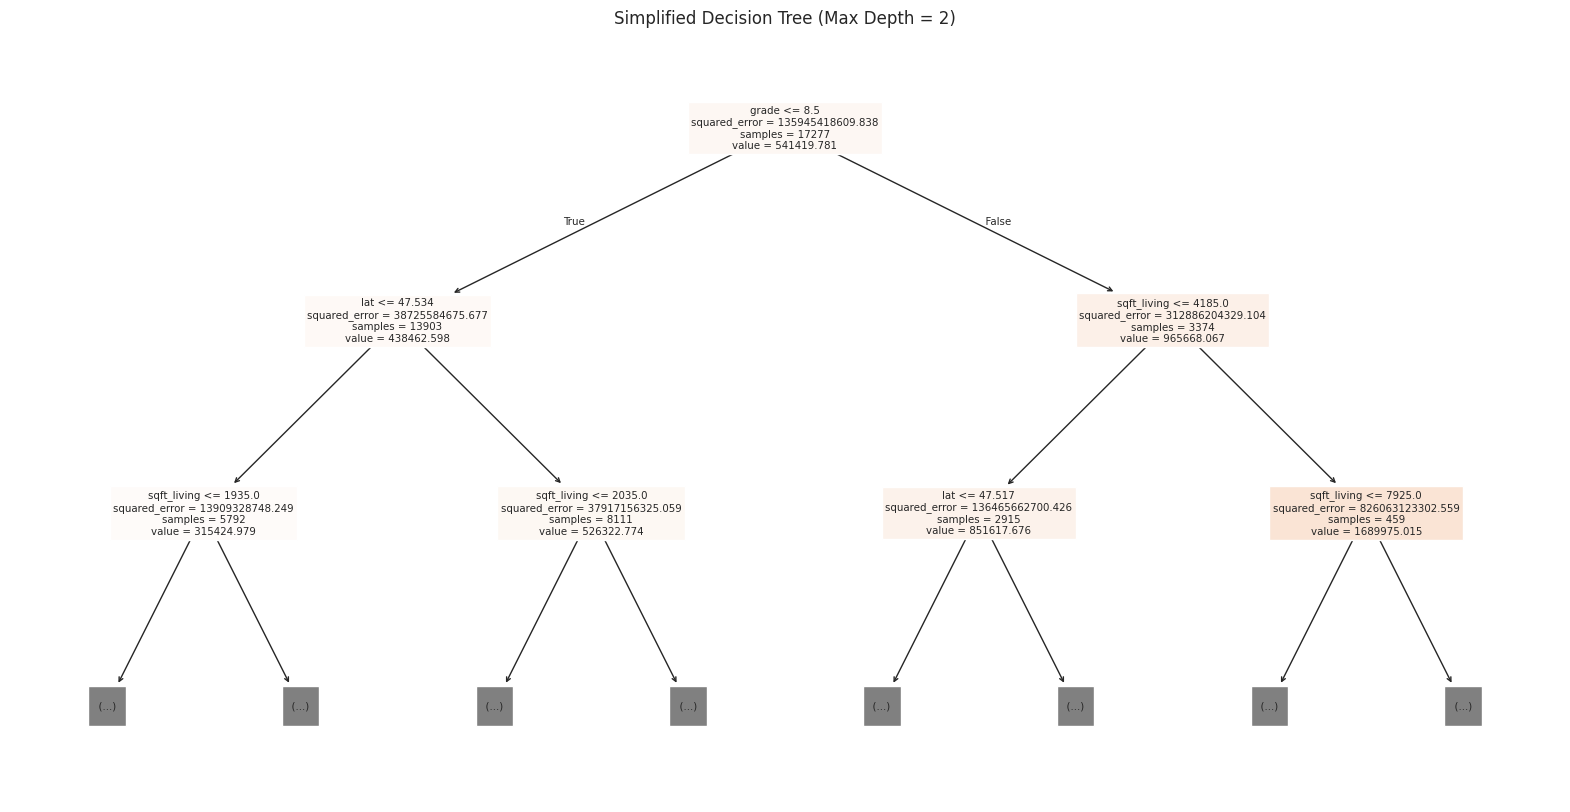

📌 Explanation: This simplified tree shows the first few decision splits made by the model. It helps visualize how the model splits the data based on feature thresholds. Each node contains the predicted price at that level.


In [1]:
# 📦 Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 📋 Configuration
sns.set(style="whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 📥 Load dataset
df = pd.read_csv("/content/kc_house_data.csv")

# 🧼 Data cleaning
df = df.drop_duplicates()
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]
df = df.drop(columns=['id', 'date'])

# 🎯 Define features and target
X = df.drop(columns='price')
y = df['price']

# 🔡 Encode categorical features if needed
X = pd.get_dummies(X, drop_first=True)

# 🔀 Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🌳 Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 🔍 Predictions
y_pred = model.predict(X_test)

# 📊 Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.3f}")

# 🔥 Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances - Decision Tree")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.show()

print("📌 Explanation: This bar chart shows the top 10 features that the Decision Tree considered most important when predicting house prices. Higher bars mean the feature had more influence in the decision splits.")

# 🌿 Tree Visualization (simplified)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, max_depth=2)
plt.title("Simplified Decision Tree (Max Depth = 2)")
plt.show()

print("📌 Explanation: This simplified tree shows the first few decision splits made by the model. It helps visualize how the model splits the data based on feature thresholds. Each node contains the predicted price at that level.")
